BoutInf (nBoutsx18):
- Columns 1 and 2: the start and end of the bout data in the continuous data variables
- Column 3: Number indicating the stimulus being shown during that bout
- Column 4: Original frame start number (allows actual timing of bout to be known, given 700 Hz frame rate)
- Columns 5:7 Pre-bout x, y position and theta in pixels and radians (???)
- Column 8: Eye Convergence during bout (2: converged; 1: not converged)
- Column 9: Change in eye convergence angle (degrees) during bout
- Column 10: Assigned eye convergence category (1=converge during  bout; 2=not converged ;  3=converged; 4=diverge during bout)
- Column 11: Bout category assigned using the scheme in Marques et al. 2018 (1=SCS; 2=LCS; 3=BS; 4=O-bend; 5=J-turn; 6=SLC; 7=S1; 8=RT; 9=S2; 10=LLC; 11=AS; 12=SAT; 13=HAT)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from childes_mi.utils.paths import DATA_DIR, ensure_dir, ZEBRAFISH_DIR
import urllib.request

In [3]:
from tqdm.autonotebook import tqdm
import h5py
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
mat_files = list(ZEBRAFISH_DIR.glob('**/*.mat'))

In [5]:
mat_files[0]

PosixPath('/mnt/cube/tsainbur/Projects/github_repos/childes_mi_project/data/raw/ZEBRAFISH_Data_Dir/3minLightDark/3minLightDark2/3minLightDark200004.mat')

In [6]:
bout_df = pd.DataFrame(columns = ['mat_loc', 'bouts', 'bout_lens'])
for mfi, mat_file in enumerate(tqdm(mat_files)):
    ds = scipy.io.loadmat(mat_file.as_posix())
    BoutInf = ds['boutStructure'][0][0][0]
    bout_category = BoutInf[:,-1].astype('int')
    bout_df.loc[len(bout_df)] = [mat_file.as_posix(), bout_category, len(bout_category)]

In [7]:
bout_df[:3]

,mat_loc,bouts,bout_lens
0,/mnt/cube/tsainbur/Projects/github_repos/child...,"[10, 12, 10, 11, 8, 10, 10, 10, 8, 12, 12, 12,...",2023
1,/mnt/cube/tsainbur/Projects/github_repos/child...,"[12, 9, 12, 13, 8, 9, 8, 8, 10, 10, 9, 8, 9, 8...",2202
2,/mnt/cube/tsainbur/Projects/github_repos/child...,"[8, 12, 12, 13, 8, 12, 8, 8, 10, 10, 10, 9, 8,...",1195


In [8]:
np.unique(np.concatenate(bout_df.bouts.values))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [9]:
np.sum(bout_df.bout_lens)

591036

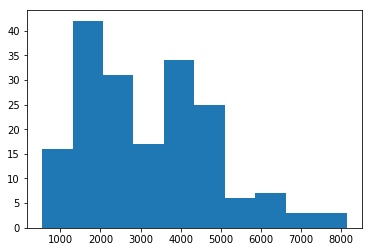

In [10]:
plt.hist(bout_df.bout_lens.values.astype('int'));

### Mutual information

In [11]:
bouts = [list(i.astype('int'))  for i in bout_df.bouts.values]

In [12]:
def remove_repeats(sequence):
    return [element for i, element in enumerate(sequence[1:]) if sequence[i] != element]

In [13]:
bouts_indv = [["{}_{}".format(bi, element) for element in bout] for bi, bout in enumerate(tqdm(bouts))]

In [14]:
bouts_indv_rr = [remove_repeats(i) for i in bouts_indv]

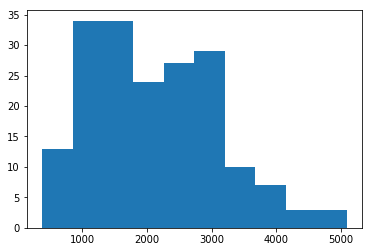

In [15]:
plt.hist([len(i) for i in bouts_indv_rr]);

In [16]:
from childes_mi.information_theory import mutual_information as mi

In [17]:
distances = np.arange(1,1001)

In [18]:
(MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
    bouts_indv_rr, distances=distances, n_jobs=-1
)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 834 tasks      | elapsed:  1.2min


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.4min finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 834 tasks      | elapsed:  1.4min


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.5min finished


In [19]:
MI_DF = pd.DataFrame(
    [[MI, MI_var, shuff_MI, shuff_MI_var, distances]],
    columns=["MI", "MI_var", "shuff_MI", "shuff_MI_var", "distances"],
)

In [20]:
MI_DF

,MI,MI_var,shuff_MI,shuff_MI_var,distances
0,"[11.122280319221097, 10.9123149216584, 10.8559...","[0.005183830214899432, 0.005129859794221152, 0...","[10.810847766607214, 10.810677673361408, 10.81...","[0.005150801831295093, 0.0051564790406694195, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [21]:
MI_DF.to_pickle(DATA_DIR / "mi" / "zebra_fish_1000.pickle")

In [22]:
row = MI_DF.iloc[0]

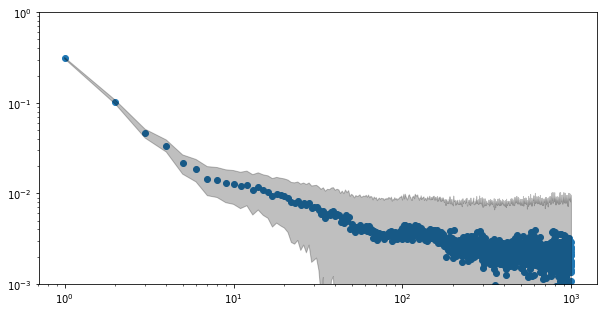

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
MI = row.MI-row.shuff_MI
MI_var = row.MI_var

ax.scatter(distances, MI)
ax.fill_between(distances, MI-MI_var, MI+MI_var, alpha = 0.25, color= 'k')
ax.set_ylim([1e-3, 1])
ax.set_yscale('log')
ax.set_xscale('log')

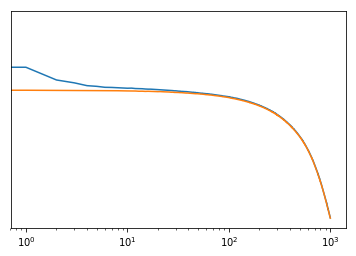

In [24]:
plt.loglog(row.MI)
plt.loglog(row.shuff_MI)

### longest sequence

In [25]:
bout_df[:3]

,mat_loc,bouts,bout_lens
0,/mnt/cube/tsainbur/Projects/github_repos/child...,"[10, 12, 10, 11, 8, 10, 10, 10, 8, 12, 12, 12,...",2023
1,/mnt/cube/tsainbur/Projects/github_repos/child...,"[12, 9, 12, 13, 8, 9, 8, 8, 10, 10, 9, 8, 9, 8...",2202
2,/mnt/cube/tsainbur/Projects/github_repos/child...,"[8, 12, 12, 13, 8, 12, 8, 8, 10, 10, 10, 9, 8,...",1195


In [26]:
longest_bouts = bout_df.bouts.values[np.argmax(bout_df.bout_lens.values)]

In [27]:
len(longest_bouts)

8143

In [28]:
longest_bouts[:10]

array([12,  8,  8, 12, 10, 13, 13, 13,  8,  8])

In [29]:
len(remove_repeats(longest_bouts))

5086

In [30]:
remove_repeats(longest_bouts)[:10]

[8, 12, 10, 13, 8, 13, 12, 13, 12, 13]

In [31]:
(MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
    [remove_repeats(longest_bouts)], distances=distances, n_jobs=-1, estimate=True
)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 834 tasks      | elapsed:    3.1s


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.7s finished


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 834 tasks      | elapsed:    3.1s


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.5s finished


In [32]:
MI_DF = pd.DataFrame(
    [[MI, MI_var, shuff_MI, shuff_MI_var, distances]],
    columns=["MI", "MI_var", "shuff_MI", "shuff_MI_var", "distances"],
)

In [33]:
row = MI_DF.iloc[0]

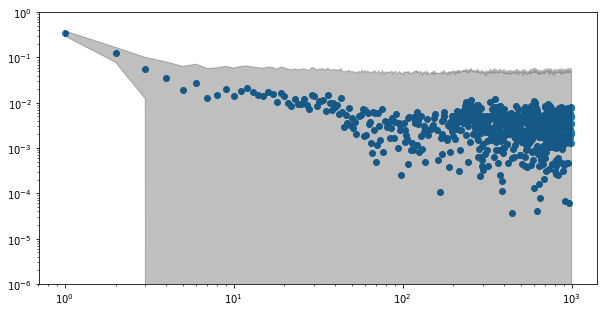

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
MI = row.MI-row.shuff_MI
MI_var = row.MI_var

ax.scatter(distances, MI)
ax.fill_between(distances, MI-MI_var, MI+MI_var, alpha = 0.25, color= 'k')
ax.set_ylim([1e-6, 1])
ax.set_yscale('log')
ax.set_xscale('log')

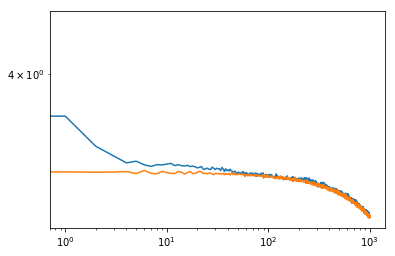

In [35]:
plt.loglog(row.MI)
plt.loglog(row.shuff_MI)